In [1]:
# Copyright 2020 Bengier Ülgen Kılıç
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights to
# use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies
# of the Software, and to permit persons to whom the Software is furnished to do
# so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all 
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
class grades():
    ##############################################################################################################
    ### grades object is the main object to calculate class averages and visualize the grades
    ###
    ###
    ### inputs: path - location of your file in your computer
    ###         file - name of your .csv file without the .csv extension
    ###         inputs - the list of strings that are exactly the same as your assignment names on Gradescope
    ###         weights - a list of integers that is the weights of the assignments in the same order as inputs
    ###
    ### attributes: self.column_names - names of the assignments on Gradescope
    ###             self.weights - weights of the assignements
    ###             self.arr - .csv file that is downloaded from Gradescope
    ###             self.size - number of students
    ###             self.names - list of strings corresponding to student names
    ###             self.ids - list of strings corresponding to student ids
    ###             self.scores - array of size len(inputs) x number of students, each row is the scores for
    ###                         an assignment for the class, if a student didn't submit an assignment, those are 
    ###                         automatically assigned a zero grade
    ###
    ### functions: self.display() - plots the averages for all the students, class average is in green, and the
    ###                             histogram for the class averages
    ###
    ###            self.rank_names() - first output is a list of lists, in an ascending order, that gives the
    ###                                overall grades
    ###                                 example: self.rank_names()[0] students who got F from the course
    ###                                          self.rank_names()[1] students who got D from the course
    ###                                          self.rank_names()[2] students who got D+ from the course
    ###                                             .
    ###                                             .
    ###                                             .
    ###                                          self.rank_names()[9] students who got A- from the course
    ###                                          self.rank_names()[10] students who got A from the course
    ###
    ###                               -second output is a dictionary with key names "D-","A","B+","F" etc..."
    ###                                giving student names with that grade
    ###
    ###            self.averages() - list of length 3, first output is a list of student averages in the same order
    ###                              as the csv file, second output is a dictionary of the averages with numbers as
    ###                              keys and the third argument is a dictionary of student averages with student
    ###                              names as keys
    ###
    ###############################################################################################################
    
    
    def __init__(self, path, file, inputs, weights):
        self.column_names = inputs
        self.weights = weights
        grade = open( path +"/" + file + ".csv", "r")
        reader_grades = csv.reader(grade)
        self.arr = [line for line in enumerate(reader_grades)]
        self.size = len(self.arr[:])-1

        names = []
        sid = []
        scores = [[] for i in range(len(self.column_names))]
        for i,m in enumerate(self.arr[0][1]):
            for k in range(1,len(self.arr[:])):
                if m == 'Name': names.append(self.arr[k][1][0])
                elif m == 'SID': sid.append(self.arr[k][1][1])
        p = 0
        for j,n in enumerate(self.column_names):
            if n in self.arr[0][1]: 
                for k in range(1,len(self.arr[:])):
                    scores[p].append(float(self.if_zero(self.arr[k][1][self.where(n,self.arr[0][1])])))
                p = p + 1
    
        self.names = names
        self.ids = sid
        self.scores = np.array(scores, dtype= float)
    
    def where(self,n,arr):
        for i in range(len(arr)):
            if n == arr[i]:
                return(i)
    def if_zero(self, entry):
        if entry == '': return('0')
        else: return(entry)
        
    def max_points(self):
        maxs_for_inputs = []
        for i,n in enumerate(self.column_names):
            w = self.where(n + ' - Max Points', self.arr[0][1])
            maxs_for_inputs.append(w)
        return(maxs_for_inputs)
    
    def normalize(self):
        normalized_scores = np.zeros((self.scores.shape))
        maximums = self.max_points()
        for i in range(len(self.column_names)):
            for j in range(len(self.arr[:])-1):
                normalized_scores[i][j] = (self.scores[i][j]/float(self.arr[1][1][maximums[i]]))*100
        return(normalized_scores)
    
    def averages(self):
        norm_scores = self.normalize()
        averages = []
        av = {}
        avs = {}
        for i in range(norm_scores.shape[1]):
            averages.append(np.dot(np.transpose(norm_scores)[i],self.weights))
            avs['%s'%self.names[i]] = averages[i]
            av['%d'%i] = averages[i]
        return(averages,av,avs)
    
    def display(self, ret = False):
        
        averages = self.averages()[0]
        x = np.arange(self.size)
        k = np.mean(averages)
        s = np.std(averages)
        m = np.sum(self.weights)*100
        minn = min(averages)

        if ret == False:
            fig,ax = plt.subplots(1,2,figsize = (20,10))
        
            ax[0].vlines(x, 0, averages, linestyle = "dashed")
            ax[0].hlines(averages, 0, x, linestyle = "dashed", color = 'r')
            ax[0].hlines(k,-5,self.size+5,linestyle = 'dashed',color = 'g', label = 'average')
            ax[0].hlines(m, -5,self.size+5, linestyle = 'dashed', color = 'b', label = 'maximum grades = %d'%(m))
            ax[0].scatter(x,averages)
            ax[0].set_title('standard deviation %2f and mean is %2f'%(s,k))
            ax[0].set_xlabel('students')
            ax[0].set_ylabel('averages')
            ax[0].set_xticks(np.arange(self.size))
            ax[0].set_xticklabels(np.transpose(np.array(self.names)).tolist(), rotation=90)
            ax[0].set_yticks(np.arange(m))
            ax[0].legend()
            
            n,bins,patches = ax[1].hist(averages, bins=11)
            ax[1].set_xlabel('grades')
            ax[1].set_ylabel('number of students')
            ax[1].vlines(k,0,max(n)+1,linestyle = 'dashed',color = 'g', label = 'average %2f'%k)
            ax[1].legend()
            
        else:n,bins,patches = plt.hist(averages, bins=11); plt.clf(); return(n)
        
    def rank_names(self):
        
        av = self.averages()[1]
        n = self.display(ret=True)
        ranked_names = []
        ranks=[[] for i in range(len(n))]
        w = 0
        
        for i in sorted(av, key = av.get):
            ranked_names.append(self.names[int(i)])
            
        for i,m in enumerate(n):
            for j in range(int(m)):
                ranks[i].append(ranked_names[w+j])
            w = w + int(m)
            
        rank_dict = {}
        grades = ['F', 'D', 'D+','C-','C','C+','B-','B','B+','A-','A']
        for i,n in enumerate(ranks):
            rank_dict[grades[i]] = n    
        
        return(ranks,rank_dict)

In [4]:
path = '/Users/bengieru/Downloads/tools_for_teaching-master-2'
file = 'MTH241-ML_Summer_2020_grades-3'
weights = [15/100, 15/100, 40/100, 5/100, 5/100, 5/100, 5/100, 5/100, 5/100]
input_arr = ['Midterm I', 'Midterm II', 'Final Exam', 'Homework I', 'Homework II', 'Homework III', 'Homework IV','Homework V', 'Homework VI']


 
A = grades(path,file,input_arr,weights)

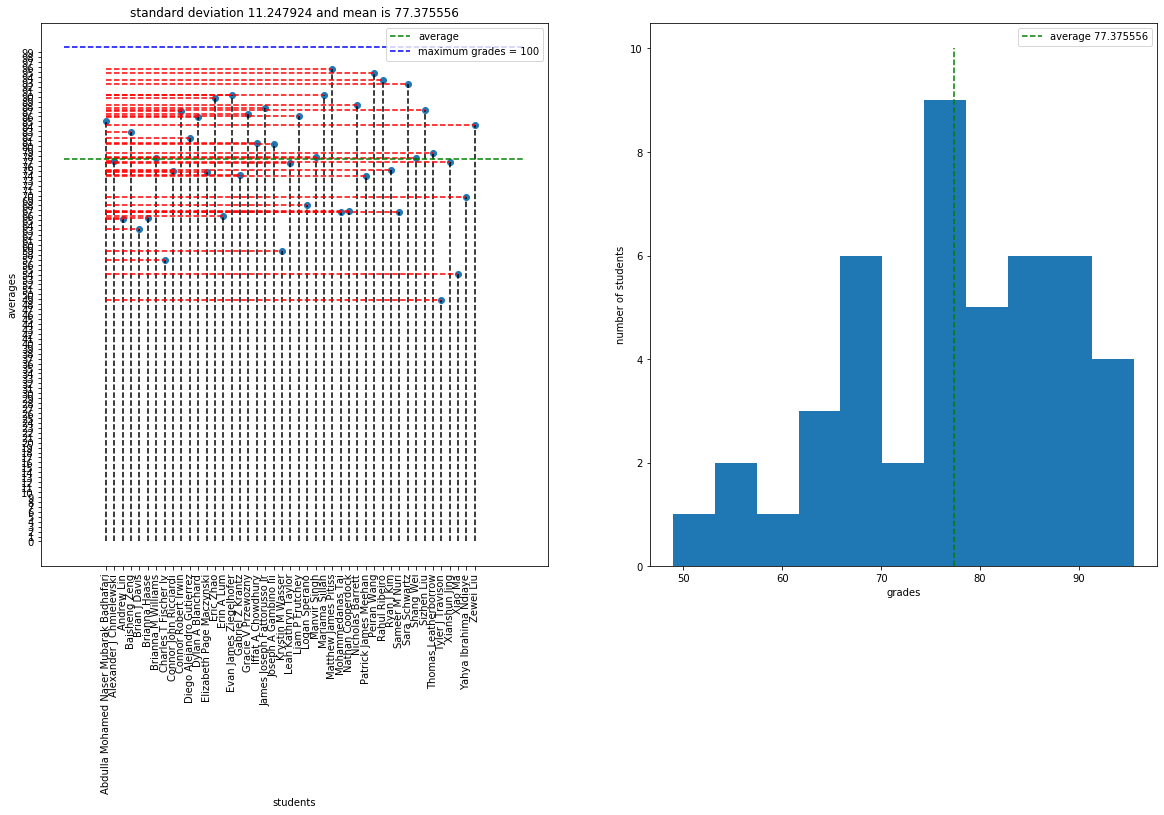

In [5]:
A.display()

In [6]:
A.rank_names()[1]

{'F': ['Tyler J Travison'],
 'D': ['Xiao Ma', 'Charles T Fischer Iv'],
 'D+': ['Krystin M Wasser'],
 'C-': ['Brian J Davis', 'Andrew Lin', 'Brianna Haase'],
 'C': ['Erin A Lum',
  'Sameer M Nuri',
  'Mohammedanas Tai',
  'Nathan Cooperdock',
  'Logan Sperano',
  'Yahya Ibrahima Ndiaye'],
 'C+': ['Patrick James Meehan', 'Gabriel Z Krantz'],
 'B-': ['Elizabeth Page Maczynski',
  'Connor John Ricciardi',
  'Ryan J Kim',
  'Leah Kathryn Taylor',
  'Xianshun Jing',
  'Alexander J Chmielewski',
  'Brianna M Williams',
  'Shang Wei',
  'Manvir Singh'],
 'B': ['Thomas Leatherborrow',
  'Joseph A Gambino Iii',
  'Iffat A Chowdhury',
  'Diego Alejandro Gutierrez',
  'Baisheng Zeng'],
 'B+': ['Zewei Liu',
  'Abdulla Mohamed Naser Mubarak Badhafari',
  'Dylan A Blanchard',
  'Liam P Frutchey',
  'Gracie V Przewozny',
  'Connor Robert Irwin'],
 'A-': ['Sizhen Liu',
  'James Joseph Fattorusso Jr',
  'Nicholas Barrett',
  'Eric Zhao',
  'Evan James Ziegelhofer',
  'Mariama Sillah'],
 'A': ['Sara Schw

<Figure size 432x288 with 0 Axes>

In [7]:
A.averages()[2]

{'Abdulla Mohamed Naser Mubarak Badhafari': 85.0929292929293,
 'Alexander J Chmielewski': 76.98080808080809,
 'Andrew Lin': 65.23636363636363,
 'Baisheng Zeng': 82.81616161616162,
 'Brian J Davis': 63.13939393939393,
 'Brianna Haase': 65.36262626262626,
 'Brianna M Williams': 77.5040404040404,
 'Charles T Fischer Iv': 57.05606060606061,
 'Connor John Ricciardi': 75.00252525252526,
 'Connor Robert Irwin': 87.01919191919191,
 'Diego Alejandro Gutierrez': 81.59444444444445,
 'Dylan A Blanchard': 85.85353535353535,
 'Elizabeth Page Maczynski': 74.75555555555556,
 'Eric Zhao': 89.83434343434344,
 'Erin A Lum': 65.93838383838384,
 'Evan James Ziegelhofer': 90.34545454545454,
 'Gabriel Z Krantz': 74.23030303030303,
 'Gracie V Przewozny': 86.52929292929292,
 'Iffat A Chowdhury': 80.64141414141415,
 'James Joseph Fattorusso Jr': 87.62626262626262,
 'Joseph A Gambino Iii': 80.42323232323233,
 'Krystin M Wasser': 58.714141414141416,
 'Leah Kathryn Taylor': 76.53535353535354,
 'Liam P Frutchey': 8